In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.insert(0, '/Users/eb/Projects/lib/weadata')
import wea_utils
import midas_parse
import pvlib
import pysolar
from math import cos, sin, radians
import muneer2004
import QC
import isd_parse
import importlib
importlib.reload(midas_parse)
importlib.reload(wea_utils)
importlib.reload(muneer2004)
importlib.reload(isd_parse)

%matplotlib inline

In [2]:
%cd /Users/eb/Projects/2020/Spectralskies_Paul

/Users/eb/Projects/2020/Spectralskies_Paul


In [169]:
lat = 53.311441
lon = -6.236059

## Import SCF series

In [52]:
scf = pd.read_csv('SP05_scf.csv')
scf.loc[:,'date_time'] = [i.replace('_',':') for i in scf.loc[:,'date_time']]
scf.index = pd.to_datetime(scf.loc[:,'date_time'])
scf.drop(labels='date_time', axis=1, inplace=True)
scf.sort_index(inplace=True)
scf

,scf
date_time,
2019-11-06 09:32:00,10
2019-11-06 09:47:00,9
2019-11-06 09:55:00,7
2019-11-06 10:02:00,10
2019-11-06 10:10:00,10
2019-11-06 10:17:00,10
2019-11-06 10:25:00,10
2019-11-06 10:33:00,10
2019-11-06 10:39:00,10


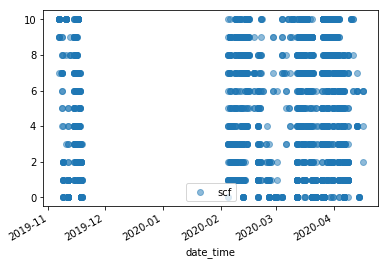

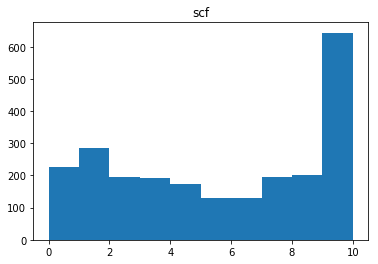

In [53]:
scf.plot(marker='o', lw=0, alpha=0.5)
plt.show()

scf.hist(grid=False, bins=10)
plt.show()

## Import daily GHI series from Met Eireann (Dublin Airport)

NB. Met Eireann irradiation data are in J/cm<sup>2</sup>

In [78]:
daily_meteire = pd.read_excel('daily_meteireann.xlsx', header=None, index_col=0, parse_dates=True)
daily_meteire = daily_meteire * 1e4 / 3600
daily_meteire

,1
0,
2019-10-01,733.333333
2019-10-02,2708.333333
2019-10-03,780.555556
2019-10-04,1972.222222
2019-10-05,688.888889
2019-10-06,3091.666667
2019-10-07,1616.666667
2019-10-08,2702.777778
2019-10-09,2527.777778


## Import irradiation data from CAMS

In [62]:
header = ['Observation period','TOA','Clear sky GHI','Clear sky BHI','Clear sky DHI','Clear sky BNI',
          'GHI','BHI','DHI','BNI','Reliability']
cams_1min = pd.read_csv('irradiation-cams-1min.csv', skiprows=43, sep=';', header=None, names=header)
cams_1min.iloc[:,0] = [i.split('/')[0] for i in cams_1min.iloc[:,0]]

cams_1min.index = pd.to_datetime(cams_1min.iloc[:,0])
cams_1min.drop(labels='Observation period', axis=1, inplace=True)
cams_1min

,TOA,Clear sky GHI,Clear sky BHI,Clear sky DHI,Clear sky BNI,GHI,BHI,DHI,BNI,Reliability
Observation period,,,,,,,,,,
2019-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:01:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:02:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:03:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:04:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:06:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:07:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2019-11-01 00:08:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Analysis

### Comparison between daily ground data (Met Eireann) and cumulative daily satellite data (CAMS)

y = 0.94 x +210.63
r^2 = 0.95



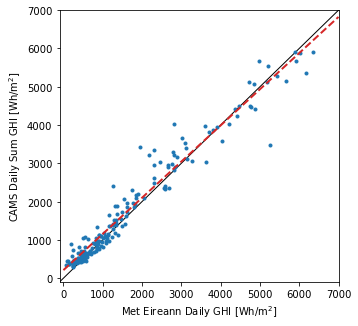

In [114]:
x = pd.Series(data=daily_meteire.loc['2019-11':'2020-04',:][1])
y = pd.Series(data=cams_1min['GHI']['2019-11':'2020-04'].resample('D').sum())
slope, intercept, r2 = wea_utils.get_regression(x,y)

plt.figure(figsize=(5,5))
plt.plot(range(-100,8000,1000),range(-100,8000,1000), color='k', lw=1)
plt.plot(daily_meteire['2019-11':'2020-04'], cams_1min['GHI']['2019-11':'2020-04'].resample('D').sum(), '.')
plt.plot(range(0,8000,1000),range(0,8000,1000)*slope+intercept, ls='--', lw=2, color='C3')
plt.xlim(-100,7000)
plt.ylim(-100,7000)
plt.xlabel('Met Eireann Daily GHI [Wh/m$^2$]')
plt.ylabel('CAMS Daily Sum GHI [Wh/m$^2$]')
plt.show()

### Looking for correlation between SCF and 1-min CAMS irradiation

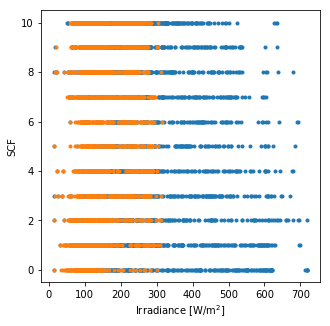

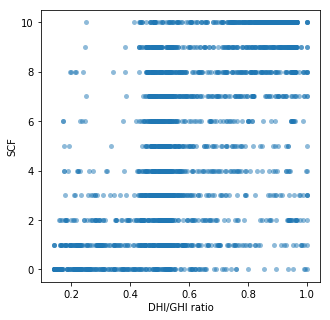

In [137]:
plt.figure(figsize=(5,5))
plt.plot((cams_1min['GHI'][scf.index]*60), scf, '.')
plt.plot((cams_1min['DHI'][scf.index]*60), scf, '.')
plt.xlabel('Irradiance [W/m$^2$]')
plt.ylabel('SCF')
plt.show()

diff_ratio = cams_1min['DHI']/cams_1min['GHI']
diff_ratio[diff_ratio>1] = 1

plt.figure(figsize=(5,5))
plt.plot(diff_ratio[scf.index], scf, '.', alpha=0.5, ms=10, mew=0)
plt.xlabel('DHI/GHI ratio')
plt.ylabel('SCF')
plt.show()

In [149]:
def do_solalt(lat, lon, ix, alt=0):
    solalt = []
    for i in ix:
        solalt_i = pysolar.solar.get_altitude(lat, lon, i, elevation=alt)
        solalt.append(solalt_i)
    solalt = pd.Series(solalt, index=ix, dtype=float)
    solalt[solalt < 2] = 0
    return solalt

def ih_extraterr(solalt, dn):
    Iex = 1367.
    if solalt > 0:
        Ieh = Iex * (1 + 0.033 * cos(0.0172024 * dn)) * sin(radians(solalt))
    else:
        Ieh = 0
    return Ieh

In [181]:
solalt = do_solalt(lat, lon, cams_1min.index)

i_ex = []

for i in cams_1min.index:
    i_ex_i = ih_extraterr(solalt[i], i.dayofyear)
    i_ex.append(i_ex_i)
    
i_ex = pd.Series(i_ex, index=cams_1min.index)

/Users/eb/Library/Enthought/Canopy/edm/envs/User/lib/python3.5/site-packages/pysolar/time.py:105: UserWarning: I don't know about leap seconds after 2015
  (leap_seconds_base_year + len(leap_seconds_adjustments) - 1)


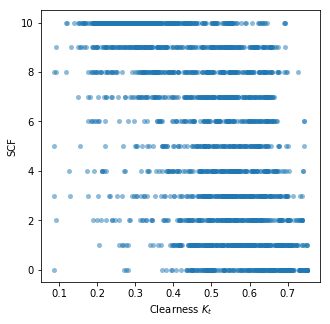

In [200]:
kt = cams_1min['GHI']*60/(i_ex)

plt.figure(figsize=(5,5))
plt.plot(kt[scf.index], scf, '.', alpha=0.5, ms=10, mew=0)
plt.xlabel('Clearness $K_t$')
plt.ylabel('SCF')
plt.show()

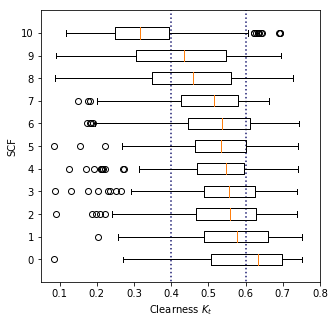

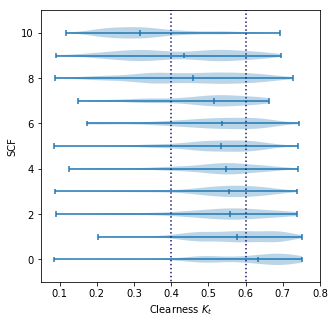

In [258]:
plt.figure(figsize=(5,5))
# plt.fill_betweenx(range(-1,12),-0.1,0.4, color='steelblue', alpha=0.4, edgecolor=None, lw=0)
# plt.fill_betweenx(range(-1,12),0.4,0.6, color='lightskyblue', alpha=0.4, edgecolor=None, lw=0)
# plt.fill_betweenx(range(-1,12),0.6,0.9, color='paleturquoise', alpha=0.4, edgecolor=None, lw=0)
plt.axvline(0.4, -1, 11, ls=':', color='midnightblue')
plt.axvline(0.6, -1, 11, ls=':', color='midnightblue')
# plt.plot(kt[scf.index], scf, '.', alpha=0.4, ms=10, mew=0)
plt.boxplot([kt[scf[scf['scf']==i].index] for i in range(11)], vert=False, positions=range(11))
plt.xlabel('Clearness $K_t$')
plt.ylabel('SCF')
plt.xlim(0.05,0.8)
plt.ylim(-1,11)
plt.show()

plt.figure(figsize=(5,5))
plt.axvline(0.4, -1, 11, ls=':', color='midnightblue')
plt.axvline(0.6, -1, 11, ls=':', color='midnightblue')
plt.violinplot([kt[scf[scf['scf']==i].index] for i in range(11)], vert=False, positions=range(11), showmedians=True)
plt.xlabel('Clearness $K_t$')
plt.ylabel('SCF')
plt.xlim(0.05,0.8)
plt.ylim(-1,11)
plt.show()

In [259]:
def find_outliers(series):
    sort_series = sorted(series)
    q1, q3= np.percentile(sort_series,[25,75])
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr)
    low_outlier = series[series < lower_bound]
    high_outlier = series[series > upper_bound]
    return low_outlier, high_outlier

In [263]:
for i in range(11):
    l,h = find_outliers(kt[scf[scf['scf']==i].index])
    print('\nSCF=%d' % i)
    print(l,h)


SCF=0
date_time
2019-11-11 08:42:00    0.085545
dtype: float64 Series([], dtype: float64)

SCF=1
date_time
2019-11-18 08:54:00    0.203413
dtype: float64 Series([], dtype: float64)

SCF=2
date_time
2019-11-16 08:51:00    0.091115
2019-11-16 09:16:00    0.198575
2020-03-30 08:20:00    0.221748
2020-03-31 15:58:00    0.208635
2020-03-31 16:04:00    0.187877
dtype: float64 Series([], dtype: float64)

SCF=3
date_time
2019-11-15 08:55:00    0.086753
2019-11-15 09:01:00    0.129441
2019-11-15 09:07:00    0.176852
2019-11-15 09:33:00    0.234431
2019-11-15 09:38:00    0.203192
2020-02-10 13:26:00    0.230789
2020-03-17 15:52:00    0.264004
2020-04-03 15:39:00    0.253027
dtype: float64 Series([], dtype: float64)

SCF=4
date_time
2019-11-17 08:59:00    0.126406
2019-11-17 09:05:00    0.213844
2020-02-11 11:07:00    0.273971
2020-03-17 15:58:00    0.192301
2020-03-17 16:23:00    0.212452
2020-03-31 15:45:00    0.270467
2020-03-31 16:10:00    0.172224
2020-04-05 14:25:00    0.221750
2020-04-05 